# 1.모듈 임포트 및 데이터 다운로드

In [161]:
from konlpy.tag import Mecab

mecab = Mecab()

import numpy as np
import matplotlib.pyplot as plt

In [162]:
path_to_file = "/content/drive/MyDrive/아이펠/GoingDeeper/2/korean-english-park.train/korean-english-park.train.ko"

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)



Data Size: 76908
Example:
>> 세계자연보전연맹(The International Union for Conservation of Nature, IUCN )은 야생동물고기의 맛을 좋아하는 사냥꾼과 서식지 감소로 통킹납작코원숭이가 멸종되고 있다고 밝혔다.
>> 만약 톰슨이 정말로 이식에 필요한 보다 많은 장기를 얻고자 원한다면 부자들과 가난한 사람들이 이식 수술을 받을 수 있는 똑같은 기회를 갖도록 해야만 한다.
>> 차타흐는 레바논 보안군이 무장대원을 목표로 할 것이며 난민촌에서 무작위로 총격을 가하지 않을 것이라고 전했다.
>> IBM측이 500시간을 들여 개발한 이 컴퓨터 게임은 동물의 기억력, 추리력, 학습능력을 검사하게 해준다.
>> 미국의 아프가니스탄, 이라크 침공을 지원하고 이곳으로 자위대를 파견하고 있는 일본은 일본이 테러조직의 공격대상이 될 가능성을 우려하고 있다.


# 2.데이터 분석 - 문장 길이 파악 + 제거


최단 문장 길이: 10
최장 문장 길이: 149
평균 문장 길이: 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


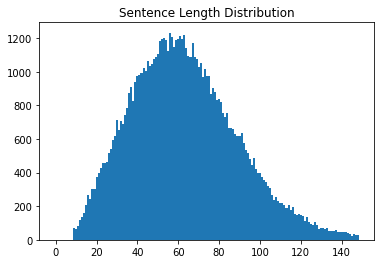

In [163]:
# 문장 길이 분포 시각화

min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("최단 문장 길이:", min_len)
print("최장 문장 길이:", max_len)
print("평균 문장 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)
for sen in raw:
    sentence_length[len(sen)-1] +=1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [164]:
# 길이 1인 문장 확인

def check_sentence_with_length(raw, length):
    count = 0

    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

In [165]:
# 긴 문장(길이 1500이상) 추출

for idx, _sum in enumerate(sentence_length):
    if _sum > 1500:
        print("Outlier Index:", idx+1)

In [166]:
# 긴 문장 확인(index:11)

check_sentence_with_length(raw, 11)

지하철 타기 겁난다.
- 네, 보이는군요.
(정당의) 원내 총무
산 위를 나는 느낌.
로그인 Korea사전
경유 1200원대로…
levee 제방, 둑
standard 표준
9. 몇 분간의 명상
그녀의 아름다운 눈.
남한의 객관적 평가?
전유를 넣은 카페라떼
아기가 숨을 멈출 때
raft 다수, 다량
의자는 비어 있었다.
라고 조던이 말했다.
조금은 새침한 샬롯？
건물 전체 무너져내려
디즈니사만이 아니다.
를 외치며 기뻐했다.
그 이유는 간단하다.
좀 더 말씀해주시죠.
키스를 잘 하는 방법
제발 답변을 주세요!
meantime 한편
천재 소녀의 '부활'
처음에는 장난이었다.
대통령 후보자의 지명
외교통상부 이슬람교도
고 소식통이 전했다.
작은 못이 아닙니다.
pledge 서약하다
끌어내다, 철수시키다
미래의 최첨단 사무실
이력서와 자기 소개서
원문기사 원문기사보기
(아직 읽고있습니까?
"사과할 것이 없다.
폭탄테러가 공포 유발
이 일은 계속됩니다.
brisk 활기를 띤
hearing 청문회
스피어스가 뚱뚱한가?
케냐 야생동물 고아원
우리는 운이 좋았다.
- 모르고 있습니다.
본서, 본부, 사령부
tribunal 법정
resign 사퇴하다
세 시간쯤 걸었을까?
큰 파티는 아니지요.
하와이, 빅 아일랜드
대답은 다음과 같다.
Congress 의회
나는 크게 실망했다.
미래 동맹 정책 구상
사업의) 합병, 합동
크라이슬러. 조업중단
정권을 잡다[장악하다
비관적인, 염세주의의
그는 "잘 모르겠다.
시대가 변하고 있다.
원화 강세 언제까지?
는 돌발질문을 했다.
더 내려야 하는 이유
이전 보기 다음 보기
그들은 신중했습니다.


Data Size: 76908
문장의 최단 길이: 10
문장의 최장 길이: 149
문장의 평균 길이: 64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


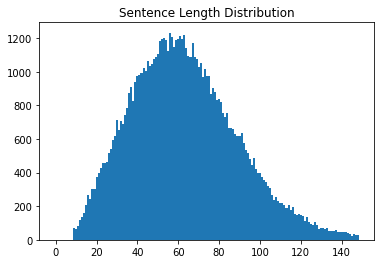

In [167]:
# 중복 제거 + 문장 길이 분포 시각화

min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


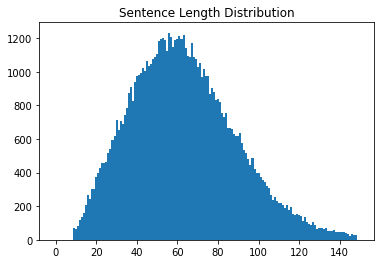

In [168]:
# 긴 문장(길이 150이상) 및 짧은 문장(길이 10이하) 제거

max_len = 150
min_len = 10

# 길이 조건에 맞는 문장 선택
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도 그리기
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

# 3.공백 기반 토큰화


In [169]:
# tokenize 함수 생성: 단어사전과 Tensor 데이터 추출

def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [170]:
# 공백 기준으로 corpus 분리

split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())


In [171]:
# 단어 사전 길이 확인
import tensorflow as tf

split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [172]:
# 단어 사전 확인
  # 불필요하게 큰 단어사전을 가지게되는 단점 발생

for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


# 4.형태소 기반 토큰화

In [173]:
# MeCab 기반 단어사전 및 Tensor 데이터 추출

def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [174]:
# 형태소 기반 토큰화 진행 + 단어 사전 길이 확인

mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("meCab vocab Size:", len(mecab_tokenizer.index_word))

meCab vocab Size: 52279


In [175]:
# Tensor를 문장으로 Decoding하기: 1. tokenizer.sequences_to_test() 함수 사용

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])

print(texts[0])

실종 되 기 전 데이비스 는 13 일 마지막 으로 목격 됐으며 , 출산 예정일 은 7 월 초 였 던 것 으로 알려졌 다 .


In [176]:
# Tensor를 문장으로 Decoding하기: 2. tokenizer.index_word를 사용

sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

실종 되 기 전 데이비스 는 13 일 마지막 으로 목격 됐으며 , 출산 예정일 은 7 월 초 였 던 것 으로 알려졌 다 . 


# 프로젝트: SentencePiece 사용하기

## 0. 모듈 임포트

In [177]:
# 0. 모듈 임포트

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import konlpy



## 1. SentencePiece 설치

In [178]:
# 1. SentencePiece 설치

! pip install sentencepiece

## 2. SentencePiece 모델 학습

In [179]:
# 예시 - tokenize() 함수

def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer


In [180]:
# SentencePiece 모델 학습

import sentencepiece as spm

temp_file = "/content/drive/MyDrive/아이펠/GoingDeeper/2/korean-english-park.train/korean-english-park.train.ko"

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:        # 이전 스텝에서 정제한 corpus 활용
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

-rw-r--r-- 1 root root 376864 Mar 16 10:01 korean_spm.model
-rw-r--r-- 1 root root 146213 Mar 16 10:01 korean_spm.vocab


In [181]:
# Sentencepiece모델 활용

s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

  # SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

  # SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.', 1, 0.0))

  # SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## 3. Tokenizer 함수 작성

In [182]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [183]:
# sp_tokenize(s, corpus) 사용 예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]


# 프로젝트: 영화 리뷰 텍스트 감성 분석

## 1. 데이터 로드


In [184]:
!git clone https://github.com/e9t/nsmc.git
  

fatal: destination path 'nsmc' already exists and is not an empty directory.


In [185]:
import os
os.listdir('nsmc')

['raw',
 'code',
 '.git',
 'README.md',
 'ratings_test.txt',
 'synopses.json',
 'ratings_train.txt',
 'ratings.txt']

In [186]:
import pandas as pd

train = pd.read_table("nsmc/"+"ratings_train.txt")
test = pd.read_table("nsmc/"+"ratings_test.txt")

print(len(train))
print(len(test))
print(train.head())
print(test.head())

150000
50000
         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
        id                                           document  label
0  6270596                                                굳 ㅋ      1
1  9274899                               GDNTOPCLASSINTHECLUB      0
2  8544678             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3  6825595                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4  6723715  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0


## 2. 데이터 전처리

In [187]:
# 중복 데이터 제거

train.drop_duplicates(subset=['document'], inplace=True)
print(len(train))


146183


In [188]:
# null값 제거

print(train.loc[train.document.isnull()])

train = train.dropna(how='any')



            id document  label
25857  2172111      NaN      1


In [189]:
# 데이터 전처리 : 한글 및 공백을 제외한 나머지 제거
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [190]:
# null값 제거: 데이터 전처리 후 새로 생긴 null 대상

train['document'] = train['document'].str.replace('^ +', "")
train_ = train.dropna(how='any')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
# 테스트 데이터 전처리: 이전 과정 반복

  # 중복 제거
test.drop_duplicates(subset=['document'], inplace=True)
  # 데이터 전처리
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
  # null값 제거
test['document'] = test['document'].str.replace('^ +', "")
test = test.dropna(how='any')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [192]:
# 전체 데이터 개수 확인
print(len(train))
print(len(test))

146182
49157


## 3. 데이터 길이 정제

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


maxlen: 140
minlen: 0
avelen: 32


<function matplotlib.pyplot.show>

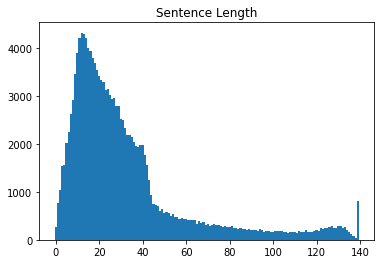

In [193]:
min_len = 999
max_len = 0
sum_len = 0

for sen in train['document']:
    length = len(sen)

    if min_len > length:
        min_len = length

    if max_len < length:
        max_len = length

    sum_len += length

print("maxlen:", max_len)
print("minlen:", min_len)
print("avelen:", sum_len//len(train))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in train['document']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length")
plt.show

In [241]:
# 긴 문장(길이 40이상) 제외

train_list = [s for s in train['document'] if len(s) <= 40]
test_list = [s for s in test['document'] if len(s) <= 40]

train_list = list(set(train_list))
test_list = list(set(test_list))

train_df = pd.DataFrame(train_list)
test_df = pd.DataFrame(test_list)



In [242]:
# 기존 데이터와 병합 후 출력

new_train_df = pd.merge(train, train_df, how='inner', left_on='document', right_on=0)
new_test_df = pd.merge(test, test_df, how='inner', left_on='document', right_on=0)

train = new_train_df[['id', 'document', 'label']]
test = new_test_df[['id', 'document', 'label']]

print(train.head())
print(test.head())

         id                               document  label
0   9976970                      아 더빙 진짜 짜증나네요 목소리      0
1   3819312             흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2  10265843                      너무재밓었다그래서보는것을추천한다      0
3   9045019              교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4   5403919  막 걸음마 뗀 세부터 초등학교 학년생인 살용영화ㅋㅋㅋ별반개도 아까움      0
        id                                  document  label
0  8544678          뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아      0
1  6825595                 지루하지는 않은데 완전 막장임 돈주고 보기에는      0
2  7898805                         음악이 주가 된 최고의 음악영화      1
3  6097171   마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가고개를 젖게한다      0
4  6242223  이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨  모든 사람이 그렇지는 않네      1


## 4. 토큰화

In [257]:
# input 및 target 데이터 분리

  # 데이터 인코딩
X_train = []
for sentence in train['document']:
    temp_X = s.EncodeAsIds(sentence)
    X_train.append(temp_X)

X_test = []
for sentence in test['document']:
    temp_X = s.EncodeAsIds(sentence)
    X_test.append(temp_X)

X_train, X_train_word_index, X_train_index_word = sp_tokenize(s, train['document'])
X_test, X_test_word_index, X_test_index_word = sp_tokenize(s, test['document'])

In [258]:
# 타겟값 추출
y_train = np.array(list(train['label']))
y_test = np.array(list(test['label']))

In [259]:
print(X_train[:5], y_train[:5])

[[ 141  106 2611  912 4856    4 4856  752   69  554  514 2648    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   4 7663  466 1756  146   14  439 3174 2766 1791  175  408  381   41
  4189    4   11 7570   29 1311  230   69    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [1328  437    0  266  254  591   95  146   10 1960    5 1011  703  249
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [2226 1162  230  995 3501  312  101  295  136   10  305 1389  344 3261
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [ 933 1033 1082  151    4    0  348  502  439  993 2905 2359   37  667
    19  730  255 2766    0 1427  571  187   30  141 2097 1898    0    0
     0    0    0    0    0  

## 5. 모델 훈련 및 평가
- loss: 0.44 / accuracy: 0.8

In [260]:
# 훈련데이터 및 검증데이터 분리

from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [261]:
# 패딩 맞추기

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=40, padding='post')
val_seq = pad_sequences(val_input, maxlen=40, padding='post')

In [262]:
# LSTM 모델 생성

from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))



In [264]:
# 모델 훈련

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_input, train_target, epochs=10, validation_data=(val_input, val_target))

Epoch 1/10
2399/2399 [==============================] - 19s 7ms/step - loss: 0.5408 - accuracy: 0.6994 - val_loss: 0.4536 - val_accuracy: 0.7931
Epoch 2/10
2399/2399 [==============================] - 14s 6ms/step - loss: 0.4121 - accuracy: 0.8128 - val_loss: 0.4221 - val_accuracy: 0.8026
Epoch 3/10
2399/2399 [==============================] - 14s 6ms/step - loss: 0.3836 - accuracy: 0.8262 - val_loss: 0.4062 - val_accuracy: 0.8123
Epoch 4/10
2399/2399 [==============================] - 14s 6ms/step - loss: 0.3591 - accuracy: 0.8370 - val_loss: 0.3993 - val_accuracy: 0.8178
Epoch 5/10
2399/2399 [==============================] - 15s 6ms/step - loss: 0.3387 - accuracy: 0.8478 - val_loss: 0.4001 - val_accuracy: 0.8182
Epoch 6/10
2399/2399 [==============================] - 15s 6ms/step - loss: 0.3210 - accuracy: 0.8577 - val_loss: 0.4119 - val_accuracy: 0.8157
Epoch 7/10
2399/2399 [==============================] - 15s 6ms/step - loss: 0.3043 - accuracy: 0.8663 - val_loss: 0.4235 - val_ac

In [265]:
evaluate = model.evaluate(X_test, y_test, verbose=2)
print(evaluate)

1003/1003 - 2s - loss: 0.4462 - accuracy: 0.8089 - 2s/epoch - 2ms/step
[0.4462137520313263, 0.808919370174408]
